In [38]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [39]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [40]:
# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [41]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [42]:
# reflect an existing database into a new model

base = automap_base()

# reflect the tables

base.prepare(engine, reflect=True)

In [43]:
# View all of the classes that automap found

base.classes.keys()

['measurement', 'station']

In [44]:
# Save references to each table

Measurement = base.classes.measurement
Station = base.classes.station

In [45]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [46]:
# Find the most recent date in the data set.


Text(0.5, 1.0, 'Big Island Precipitation \n 2016-08-24 to 2017-08-24')

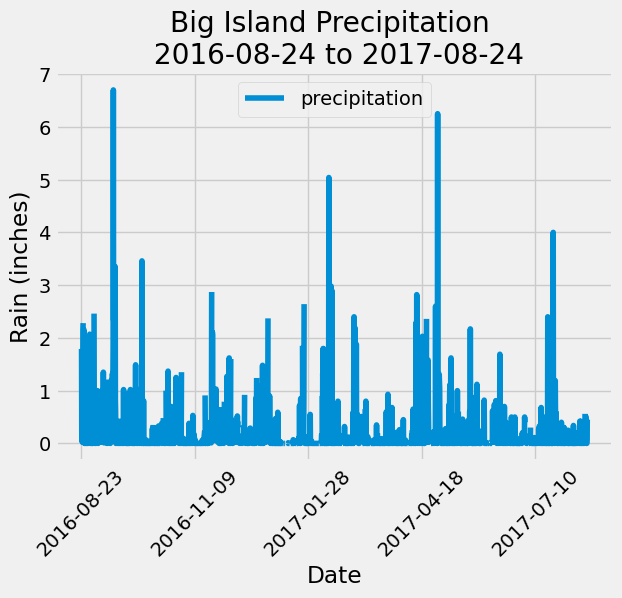

In [47]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results, 
#    starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.

year_prcp = dt.date(2017, 8, 23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores

# All queries in SQLAlchemy begin with session.query(). Need to filter out all of the data that is older than a year 
#    from the last date then add the .all() function to extract all of the results from the query and put in a list.

prcp_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_prcp).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names

annual_prcp_df = pd.DataFrame(prcp_results, columns=['date','precipitation'])
annual_prcp_df.set_index(annual_prcp_df['date'], inplace=True)


# Sort the dataframe by date

sorted_prcp_df = annual_prcp_df.sort_index()


# Use Pandas Plotting with Matplotlib to plot the data

sorted_prcp_df.plot()
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel("Rain (inches)")
plt.title("Big Island Precipitation \n 2016-08-24 to 2017-08-24")

In [48]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [49]:
# Design a query to calculate the total number of stations in the dataset

session.query(func.count(Station.station)).all()

[(9,)]

In [50]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [51]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

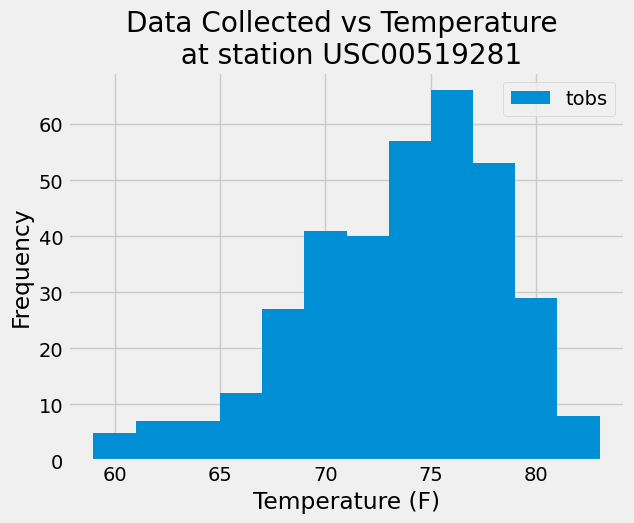

In [62]:
# Using the most active station id, query the last 12 months of temperature observation data for this station 
#     and plot the results as a histogram.

results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= year_prcp).all()


station_df = pd.DataFrame(results, columns = ['tobs'])
station_df.plot.hist(bins=12)
plt.title('Data Collected vs Temperature \n at station USC00519281')
plt.xlabel('Temperature (F)')
plt.ylabel("Frequency")

# Close Session

In [63]:
# Close Session
session.close()